<a href="https://colab.research.google.com/github/MedhaParhy/SpamClassifierNB/blob/main/SpamClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split , GridSearchCV
%matplotlib inline

In [21]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [22]:
data = pd.read_csv('gdrive/My Drive/spam.csv',encoding="latin1")[['v1', 'v2']]
data.columns = ['label', 'message']
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

<Axes: xlabel='label', ylabel='count'>

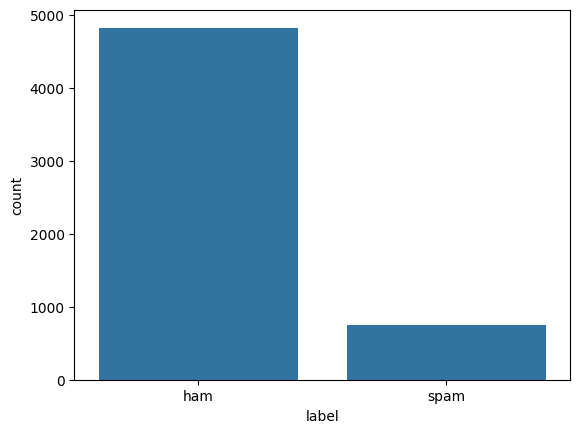

In [24]:
sns.countplot(data=data, x='label')

In [28]:
def text_process(text):
  text = text.lower()
  text = ''.join([t for t in text if t not in string.punctuation])
  text = [t for t in text.split() if t not in stopwords.words('english')]
  st = Stemmer()
  text = [st.stem(t) for t in text]
  return text

In [29]:
print(text_process('Hi, this is Medha. I am trying to test the word processor!!!'))

['hi', 'medha', 'tri', 'test', 'word', 'processor']


In [32]:
label=data['label']
f = feature_extraction.text.CountVectorizer(analyzer=text_process)
features = f.fit_transform(data["message"])
#features=data['message'].apply(text_process)

In [33]:
features.shape

(5572, 8097)

In [34]:
label=np.array(label)
label.shape

(5572,)

In [35]:
ros = RandomOverSampler(random_state=42)
features, label = ros.fit_resample(features, label)
print(features.shape)
print(label.shape)

(9650, 8097)
(9650,)


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state = 42)

In [37]:
print([x_train.shape, x_test.shape])

[(6755, 8097), (2895, 8097)]


In [38]:
model=MultinomialNB()

In [39]:
model.fit(x_train, y_train)

MultinomialNB()

In [42]:
y_pred = model.predict(x_test)
metrics.accuracy_score(y_test, y_pred)*100

97.61658031088083

In [43]:
model.score(x_test,y_test)

0.9761658031088083

In [66]:
sample = input('Enter a message:')
data = f.transform([sample]).toarray()
print(model.predict(data))

Enter a message:reply msg
['spam']


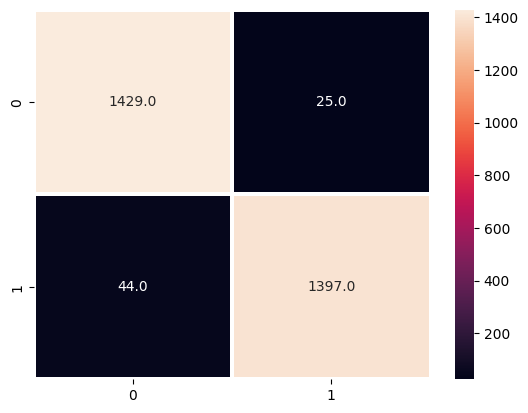

In [50]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)

conf = confusion_matrix(y_pred=y_pred,y_true=y_test)
import seaborn
seaborn.heatmap(conf,annot=True,fmt=".1f",linewidths=1.5)
import matplotlib.pyplot as plt
plt.show()

In [ ]:
https://www.kaggle.com/code/pablovargas/naive-bayes-svm-spam-filtering
https://www.kaggle.com/code/mehmetlaudatekman/filtering-spam-e-mails-power-of-naive-bayes
https://www.kaggle.com/code/upendrachaturvedi/sms-spam-detection-with-ml
https://www.kaggle.com/code/swekerr/sms-spam-filter-naive-bayes
https://medium.com/@Coursesteach/spam-detection-using-machine-learning-methods-dd5dbc799b6b